[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/5_Visualizacion/Ejercitacion/Ejercitacion_Extra_Resuelta.ipynb)

# Ejercicios extra visualización

Se pedirá realizar graficos con distintos dataset. Es importante que cada uno de ellos cuente con un título y los respectivos nombres en sus ejes.


## 1. Serie de tiempo

Se pide realizar un análisis exploratorio de una serie de datos macroeconomicos, para ello es necesario visualizar la serie y otros gráficos descriptivos de la misma que se indicarán a continuación.

In [93]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/data_macro.csv', sep=',', index_col=0)

In [95]:
df.head()

,Año,Trimestre,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,2004,I,475.774,76.726,110.908,301.075,52.471
1,2004,II,469.984,80.629,114.546,305.247,52.962
2,2004,III,493.773,82.344,117.306,317.382,54.495
3,2004,IV,500.929,87.173,119.994,324.624,55.747
4,2005,I,515.446,89.021,128.989,321.890,57.651


La función transform nos permite aplicar operaciones por grupos, por ejemplo para sacar el rango.

In [96]:
df.groupby('Año').transform(lambda x: (x.min() - x.max()))

,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,-30.945,-10.447,-9.086,-23.549,-3.276
1,-30.945,-10.447,-9.086,-23.549,-3.276
2,-30.945,-10.447,-9.086,-23.549,-3.276
3,-30.945,-10.447,-9.086,-23.549,-3.276
4,-24.949,-9.352,-4.180,-22.024,-3.024
...,...,...,...,...,...
59,-45.644,-53.600,-21.767,-59.112,-2.625
60,-6.945,-13.496,-8.996,-3.924,-4.075
61,-6.945,-13.496,-8.996,-3.924,-4.075
62,-6.945,-13.496,-8.996,-3.924,-4.075


In [97]:
# tomamos 1 por año
df.groupby('Año').transform(lambda x: (x.min() - x.max())).iloc[::4]

,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,-30.945,-10.447,-9.086,-23.549,-3.276
4,-24.949,-9.352,-4.180,-22.024,-3.024
8,-34.558,-9.371,-8.243,-27.603,-2.459
12,-39.587,-16.742,-16.086,-27.895,-2.314
16,-30.245,-21.036,-26.435,-11.232,-1.928
20,-34.905,-18.936,-15.825,-31.874,-5.816
24,-40.841,-33.407,-20.604,-40.369,-4.534
28,-12.848,-17.100,-7.659,-20.071,-2.114
32,-33.871,-18.456,-23.489,-24.668,-2.478
36,-9.609,-8.110,-15.112,-19.110,-2.959


### 1.1
Graficar la serie de importaciones, en el eje de las abscisas deben ir los años, mientras que en el de las ordenadas la cantidad importada.

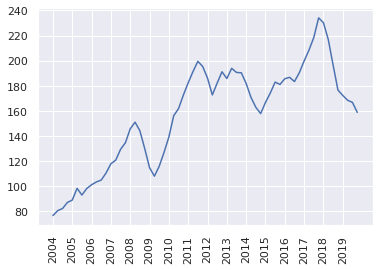

In [98]:
df['Importaciones_D'].plot();
años = df['Año'].unique()
plt.xticks(range(0, len(años)*4, 4), años, rotation=90);

### 1.2

Graficar los cierres anuales para exportaciones, importaciones, consumo publico, consumo privado y PBI. Recuerde incorporar los años en el eje horizontal.

In [99]:
df.columns

Index(['Año', 'Trimestre', 'PIB_D', 'Importaciones_D', 'Exportaciones_D',
       'Consumo_Privado_D', 'Consumo_Publico_D'],
      dtype='object')

In [100]:
df['Año'].unique().shape[0]

16

In [101]:
df.head()

,Año,Trimestre,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,2004,I,475.774,76.726,110.908,301.075,52.471
1,2004,II,469.984,80.629,114.546,305.247,52.962
2,2004,III,493.773,82.344,117.306,317.382,54.495
3,2004,IV,500.929,87.173,119.994,324.624,55.747
4,2005,I,515.446,89.021,128.989,321.890,57.651


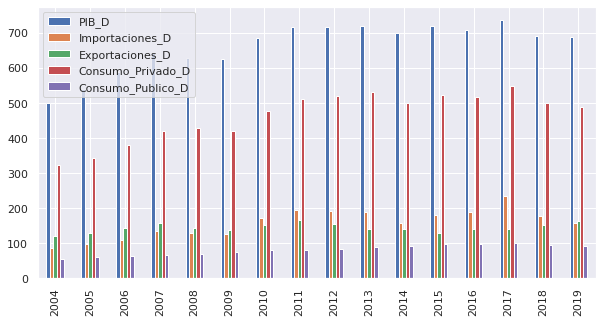

In [102]:
# Tomamos 1 trimestre por año
cols = ['Trimestre', 'PIB_D', 'Importaciones_D', 'Exportaciones_D', 'Consumo_Privado_D', 'Consumo_Publico_D']
# graficamos y especificamos un tamaño
df.loc[3::4, cols].plot(kind='bar', figsize=(10,5))
labels = df['Año'].unique()
plt.xticks(range(0, labels.shape[0]), labels);

### 1.3 
Graficar la serie de exportaciones junto a su media movil y su desvio estandar móvil. Usar la función .rolling de pandas

In [103]:
media_movil = df['Exportaciones_D'].rolling(4).mean()
desvio_movil = df['Exportaciones_D'].rolling(4).std()

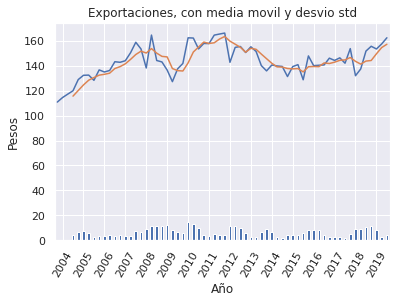

In [104]:
df['Exportaciones_D'].plot()
media_movil.plot()
desvio_movil.plot(kind='bar')
plt.xticks(range(1,65,4), df['Año'].unique(), rotation=60)
plt.xlabel('Año')
plt.title('Exportaciones, con media movil y desvio std')
plt.ylabel('Pesos');

In [115]:
# seaborn puede complementarse con matplotlib
import seaborn as sns
sns.set_style('dark')

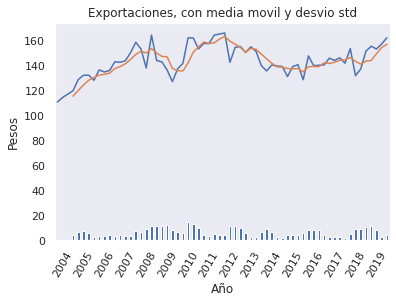

In [116]:
df['Exportaciones_D'].plot()
media_movil.plot()
desvio_movil.plot(kind='bar')
plt.xticks(range(1,65,4), df['Año'].unique(), rotation=60)
plt.xlabel('Año')
plt.title('Exportaciones, con media movil y desvio std')
plt.ylabel('Pesos');

## 2. Iris Dataset

Utilizando el [Iris Dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris), una base de datos que contiene información acerca de tres especies de flores distintas, vamos realizar algunos gráficos para entender mejor su comportamiento. Este dataset es ampliamente utilizado en el ámbito academico para la práctica de visualización de datos, es recomendable que investiguen y vean los distintos trabajos realizados sobre el mismo. 

In [117]:
df = pd.read_csv("https://datasets-humai.s3.amazonaws.com/datasets/data_iris.csv")

In [118]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2.1 
Graficar las distribución del largo del sepalo.

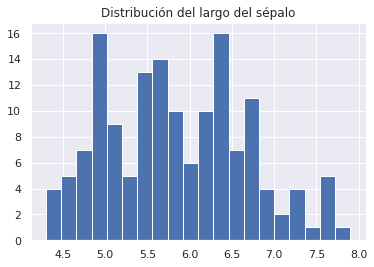

In [119]:
df['SepalLengthCm'].hist(bins=20);
plt.title('Distribución del largo del sépalo');

# 2.2
Graficar la función de densidad del largo del sépalo.

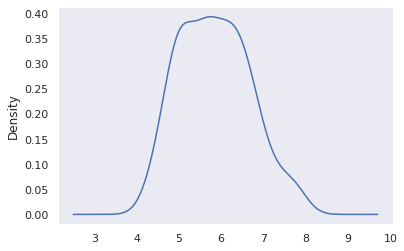

In [120]:
df['SepalLengthCm'].plot.density();

Extra: probar si sigue una distribución normal con [prueba KS](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)

In [121]:
from scipy.stats import kstest
x = df['SepalLengthCm']
# normalizamos 
norm = (x - x.mean())/x.std()
kstest(norm, 'norm')

KstestResult(statistic=0.08865361377316261, pvalue=0.17825845115993574)

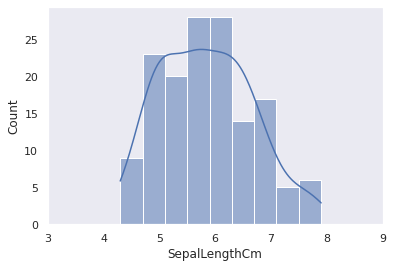

In [122]:
import seaborn as sns
sns.histplot(df['SepalLengthCm'], kde=True)
plt.xlim(3, 9);

## 3. Plotly

In [123]:
import plotly.graph_objects as go
import plotly.express as px

### 3.1

Con plotly express realizar un gráfico de dispersion donde el eje de ordenadas explique el largo del sepalo y el eje de abscisas explique el largo del pétalo con cada una de las especies.

In [124]:
fig = px.scatter(df, x='PetalLengthCm', y='SepalLengthCm', color='Species', title='Iris')
fig.show()

### 3.2

Realizar lo mismo que en el 3.1 pero con un *objeto gráfico* de plotly. Vemos que podemos hacer una mayor personalización.

In [125]:
# Especie versicolor
t1 = go.Scatter(x=df['PetalLengthCm'][df['Species'] == 'Iris-versicolor'],
                    y=df['SepalLengthCm'][df['Species'] == 'Iris-versicolor'],
                    mode='markers',
                    marker_color='rgb(140, 190, 20)', 
                    marker_symbol='star-square',
                    name='versicolor')

# Especie setosa
t2 = go.Scatter(x=df['PetalLengthCm'][df['Species'] == 'Iris-setosa'],
                    y=df['SepalLengthCm'][df['Species'] == 'Iris-setosa'],
                    mode='markers',
                    marker_color='rgb(240, 90, 20)', 
                    marker_symbol='star-triangle-up')

# Especies virginica
t3 = go.Scatter(x=df['PetalLengthCm'][df['Species'] == 'Iris-virginica'],
                    y=df['SepalLengthCm'][df['Species'] == 'Iris-virginica'],
                    mode='markers',
                    marker_color='rgb(40, 190, 100)', 
                    marker_symbol='star-square')

In [126]:
fig = go.Figure([t1,t2,t3])
fig.show()

## Extra

### Visulización de imagenes

Utilizando una imagen que tengan guardada en su computadora, vamos a visualizarla.

In [127]:
!wget https://careers.edicomgroup.com/wp-content/uploads/2021/03/DeepLearning-2.jpg -O img.jpg

--2021-06-18 00:32:14--  https://careers.edicomgroup.com/wp-content/uploads/2021/03/DeepLearning-2.jpg
Resolving careers.edicomgroup.com (careers.edicomgroup.com)... 35.214.253.216
Connecting to careers.edicomgroup.com (careers.edicomgroup.com)|35.214.253.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61685 (60K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  60.24K   225KB/s    in 0.3s    

2021-06-18 00:32:15 (225 KB/s) - ‘img.jpg’ saved [61685/61685]



In [131]:
# Leer los pixeles de una imagen
import matplotlib.image as mpimg
img = mpimg.imread('img.jpg')

In [132]:
print(img)

[[[105 161 184]
  [105 161 184]
  [105 161 184]
  ...
  [104 162 184]
  [104 162 184]
  [104 162 184]]

 [[105 161 184]
  [105 161 184]
  [105 161 184]
  ...
  [104 162 184]
  [104 162 184]
  [104 162 184]]

 [[105 161 184]
  [105 161 184]
  [105 161 184]
  ...
  [104 162 184]
  [104 162 184]
  [104 162 184]]

 ...

 [[189 213 225]
  [189 213 225]
  [189 213 225]
  ...
  [189 213 225]
  [189 213 225]
  [189 213 225]]

 [[189 213 225]
  [189 213 225]
  [189 213 225]
  ...
  [189 213 225]
  [189 213 225]
  [189 213 225]]

 [[189 213 225]
  [189 213 225]
  [189 213 225]
  ...
  [189 213 225]
  [189 213 225]
  [189 213 225]]]


La función plt.imshow para visualizar la imagen.

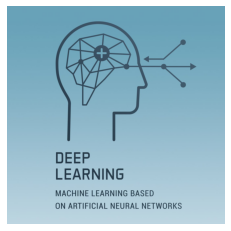

In [130]:
plt.imshow(img)
plt.axis(False);